In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Initial Checks

In [42]:
df = pd.read_csv("Dataset.csv")
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## Converting strings to numericals

In [43]:
from sklearn.preprocessing import LabelEncoder

df['Result'] = LabelEncoder().fit_transform(df['Result'])
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [45]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [46]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
print(f'Total Number of Patients: {len(df)}')

Total Number of Patients: 1319


## Feature Addition

In [49]:
df.insert(loc = 5, column = 'MAP', value = (df["Systolic blood pressure"] + 2 * df["Diastolic blood pressure"]) / 3)
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,MAP,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,108.666667,160.0,1.80,0.012,0
1,21,1,94,98,46,63.333333,296.0,6.75,1.060,1
2,55,1,64,160,77,104.666667,270.0,1.99,0.003,0
3,64,1,70,120,55,76.666667,270.0,13.87,0.122,1
4,55,1,64,112,65,80.666667,300.0,1.08,0.003,0


# EDA

## Distribution of Patient Ages Across the Dataset

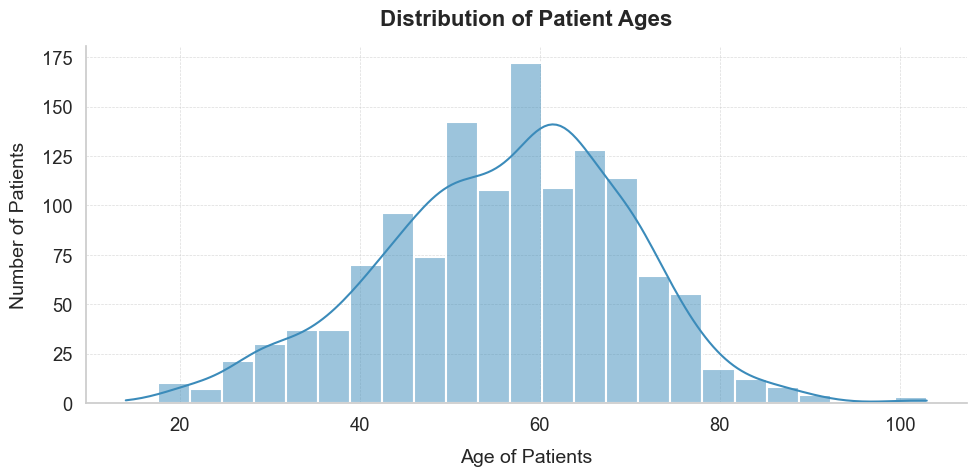

In [50]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

plt.figure(figsize=(10, 5))
sns.histplot(
    x=df['Age'],
    kde=True,
    bins=25,
    color="#3b8bba",
    edgecolor='white',
    linewidth=1.5
)

plt.xlabel('Age of Patients', fontsize=14, labelpad=10)
plt.ylabel('Number of Patients', fontsize=14, labelpad=10)
plt.title('Distribution of Patient Ages', fontsize=16, weight='bold', pad=15)

sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


## Distribution of Patient Ages for Those With and Without a Heart Attack

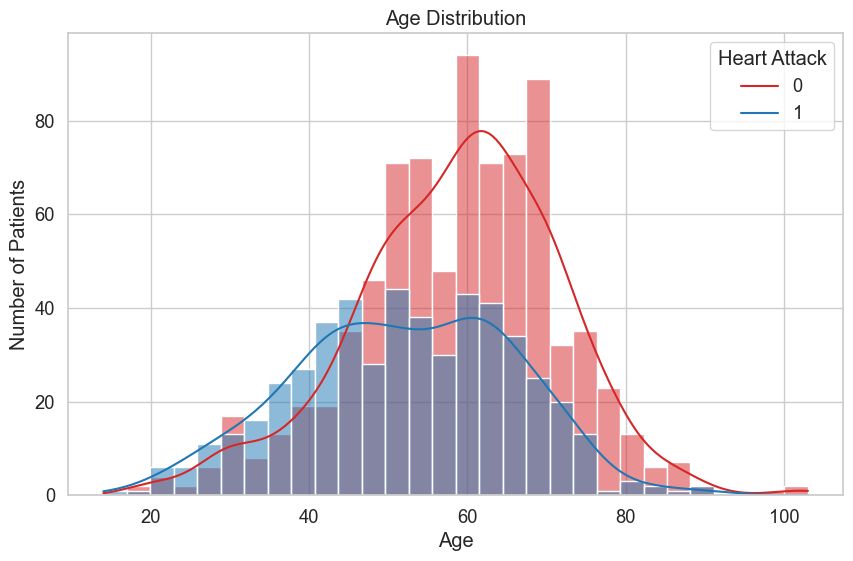

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Result', kde=True, bins=30, palette=['#1f77b4', '#d62728'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack', labels=[0, 1])
plt.show()

In [52]:
df_pos = df[df["Result"] == 1].copy()
df_neg = df[df["Result"] == 0].copy()

In [53]:
print(f'Number of Positive Cases: {len(df_pos)}')
print(f'Number of Negative Cases: {len(df_neg)}')
print(f'Mortality Rate: {len(df_pos)/len(df)*100:.2f}%')

Number of Positive Cases: 810
Number of Negative Cases: 509
Mortality Rate: 61.41%


## Count By Category

### Number of Patients by Gender for those with and without a Heart Attack

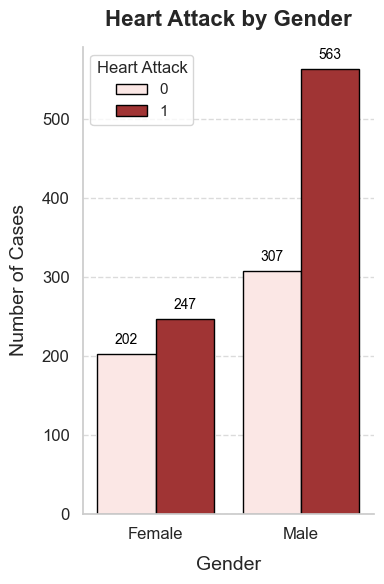

In [54]:
df_g = df[['Gender', 'Result']].copy()
df_g['Gender_label'] = df_g['Gender'].map({1: 'Male', 0: 'Female'})

grouped = df_g.groupby(['Gender_label', 'Result']).size().reset_index(name='Count')

sns.set(style='whitegrid')
palette = ['mistyrose', 'firebrick']

plt.figure(figsize=(4, 6))
ax = sns.barplot(
    data=grouped,
    x='Gender_label',
    y='Count',
    hue='Result',
    palette=palette,
    edgecolor='black'
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Heart Attack by Gender', fontsize=16, weight='bold', pad=15)
plt.xlabel('Gender', fontsize=14, labelpad=10)
plt.ylabel('Number of Cases', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Heart Attack', title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()
plt.show()

### Number of Patients Across each Blood Pressure Category for those with and without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2743198217.py:27: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.barplot(data=grouped, x='BP Category', y='Count', hue='Result', palette=palette, order=bp, edgecolor='black')


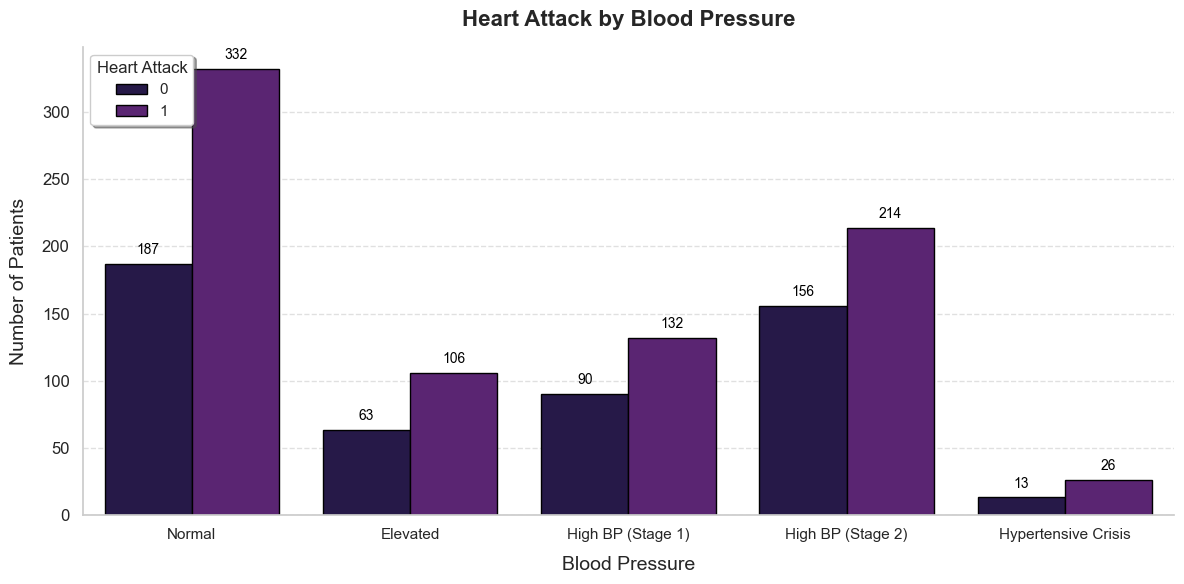

In [55]:
def categorize_bp(row):
    sys = row['Systolic blood pressure']
    dia = row['Diastolic blood pressure']
    
    if sys > 180 or dia > 120:
        return "Hypertensive Crisis"
    elif sys >= 140 or dia >= 90:
        return "High BP (Stage 2)"
    elif 130 <= sys <= 139 or 80 <= dia <= 89:
        return "High BP (Stage 1)"
    elif 120 <= sys <= 129 and dia < 80:
        return "Elevated"
    elif sys < 120 and dia < 80:
        return "Normal"
    else:
        return "Uncategorized"
bp = ['Normal', 'Elevated', 'High BP (Stage 1)', 'High BP (Stage 2)', 'Hypertensive Crisis']
df_bp = df[['Systolic blood pressure', 'Diastolic blood pressure', 'Result']].copy()
df_bp['BP Category'] = df_bp.apply(categorize_bp, axis=1)

grouped = df_bp.groupby(['BP Category', 'Result']).size().reset_index(name='Count')

sns.set(style='whitegrid')
palette = sns.color_palette('magma')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='BP Category', y='Count', hue='Result', palette=palette, order=bp, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Heart Attack by Blood Pressure', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Blood Pressure', fontsize=14, labelpad=10)
plt.ylabel('Number of Patients', fontsize=14, labelpad=10)
plt.yticks(fontsize=12)
plt.legend(title='Heart Attack', title_fontsize=12, fontsize=11, loc='upper left', frameon=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)

sns.despine()
plt.tight_layout()
plt.show()

### Number of Patients Across each Blood Sugar Category for those with and without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\3251587189.py:24: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  ax = sns.barplot(data=grouped, x='Blood Sugar Category', y='Count', hue='Result',


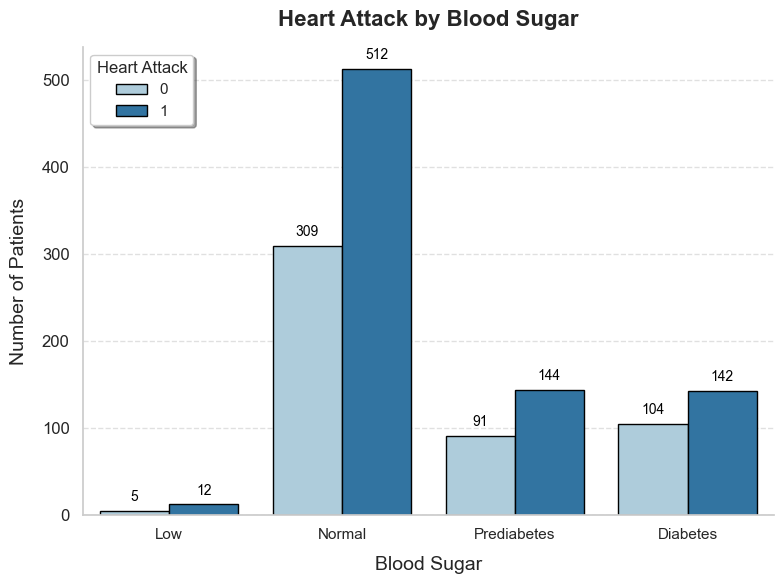

In [56]:
def categorize_blood_sugar(value):
    if value >= 200:
        return "Diabetes"
    elif 140 <= value < 200:
        return "Prediabetes"
    elif 70 <= value < 140:
        return "Normal"
    else:
        return "Low"
    
sugar = ['Low', 'Normal', 'Prediabetes', 'Diabetes']

df_sugar = df[['Blood sugar', 'Result']].copy()
df_sugar['Blood Sugar Category'] = df_sugar['Blood sugar'].apply(categorize_blood_sugar)


grouped = df_sugar.groupby(['Blood Sugar Category', 'Result']).size().reset_index(name='Count')


sns.set(style='whitegrid')
palette = sns.color_palette('Paired')

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped, x='Blood Sugar Category', y='Count', hue='Result',
                 palette=palette, order=sugar, edgecolor='black')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')


plt.title('Heart Attack by Blood Sugar', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Blood Sugar', fontsize=14, labelpad=10)
plt.ylabel('Number of Patients', fontsize=14, labelpad=10)
plt.yticks(fontsize=12)
plt.legend(title='Heart Attack', title_fontsize=12, fontsize=11, loc='upper left', frameon=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)

sns.despine()
plt.tight_layout()
plt.show()


### Mean Heart Rate across Age Groups for those with and without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\118742369.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df1.groupby(['Age_group', 'Result'])['Heart rate'].mean().reset_index()
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\118742369.py:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax = sns.barplot(
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\118742369.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\118742369.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

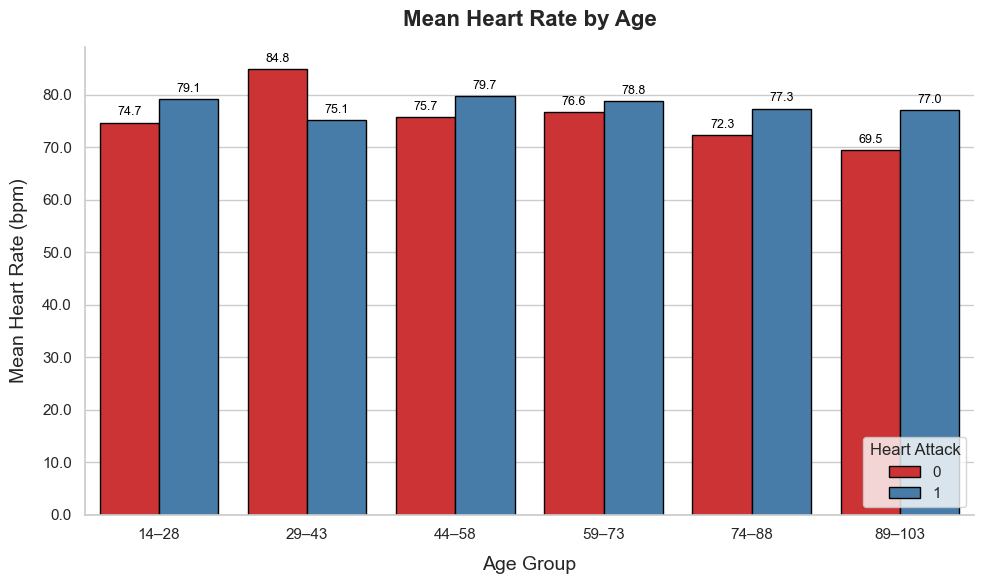

In [57]:
df1 = df.copy()

bins = range(int(df1['Age'].min()), int(df1['Age'].max()) + 15, 15)
labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins) - 1)]
df1['Age_group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

grouped = df1.groupby(['Age_group', 'Result'])['Heart rate'].mean().reset_index()

sns.set(style="whitegrid")
palette = sns.color_palette("Set1")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grouped,
    x='Age_group',
    y='Heart rate',
    hue='Result',
    palette=palette,
    edgecolor='black'
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9,
                    color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

ax.set_title('Mean Heart Rate by Age', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Age Group', fontsize=14, labelpad=10)
ax.set_ylabel('Mean Heart Rate (bpm)', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_yticklabels(ax.get_yticks(), fontsize=11)
ax.legend(title='Heart Attack', title_fontsize=12, fontsize=11, loc='lower right')

sns.despine()
plt.tight_layout()
plt.show()

### MAP across Age Groups for those with and without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2347254250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_map = (df1.groupby(['Age_group', 'Result'])['MAP'].mean().sort_index().reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2347254250.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.barplot(
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2347254250.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2347254250.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() 

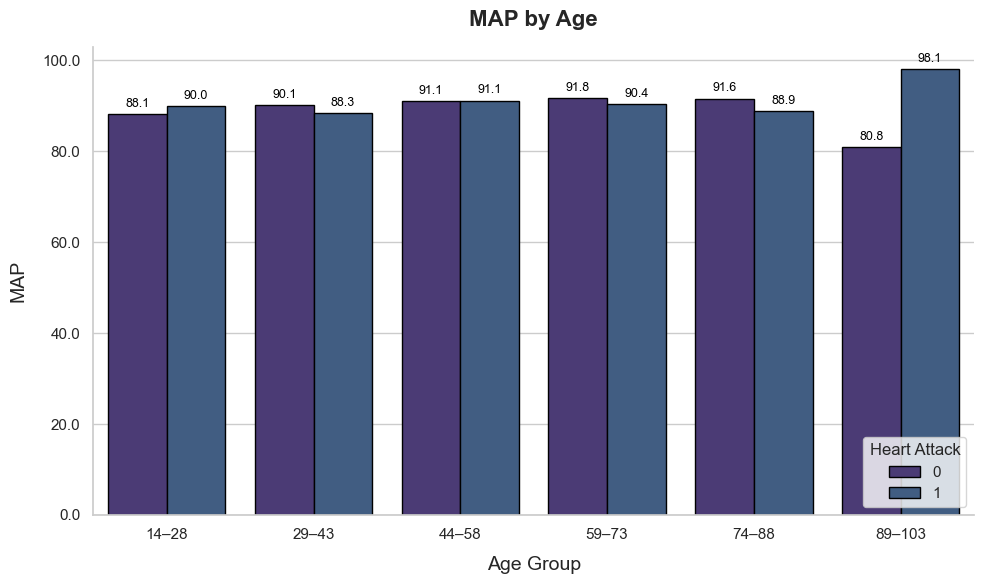

In [58]:
mean_map = (df1.groupby(['Age_group', 'Result'])['MAP'].mean().sort_index().reset_index())

sns.set(style="whitegrid")
palette = sns.color_palette("viridis")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=mean_map,
    x='Age_group',
    y='MAP',
    hue='Result',
    palette=palette,
    edgecolor='black'
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9,
                    color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

ax.set_title('MAP by Age', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Age Group', fontsize=14, labelpad=10)
ax.set_ylabel('MAP', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_yticklabels(ax.get_yticks(), fontsize=11)
ax.legend(title='Heart Attack', title_fontsize=12, fontsize=11, loc='lower right')

sns.despine()
plt.tight_layout()
plt.show()

## Distribution across Age Groups

### Distribution of Troponin Levels Across Age Groups for those with Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\2252844787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


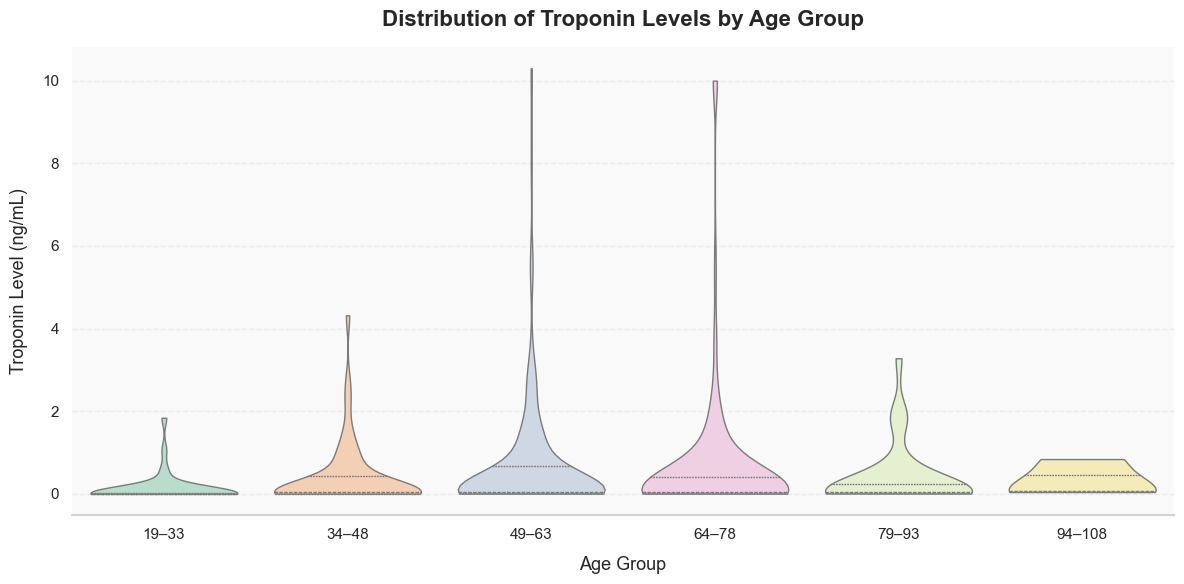

In [59]:
pos_bins = range(int(df_pos['Age'].min()), int(df_pos['Age'].max()) + 15, 15)
pos_labels = [f"{pos_bins[i]}–{pos_bins[i+1]-1}" for i in range(len(pos_bins)-1)]
df_pos['Age Group'] = pd.cut(df_pos['Age'], bins=pos_bins, labels=pos_labels, right=False)

sns.set(style="whitegrid", rc={"axes.facecolor": "#f9f9f9", "grid.color": "#dddddd"})

plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=df_pos,
    x='Age Group',
    y='Troponin',
    palette=sns.color_palette("Pastel2", len(pos_labels)),
    inner='quartile',
    linewidth=1,
    cut=0
)

plt.title('Distribution of Troponin Levels by Age Group', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Age Group', fontsize=13, labelpad=10)
plt.ylabel('Troponin Level (ng/mL)', fontsize=13, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Distribution of Troponin Levels Across Age Groups for those without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\585264571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


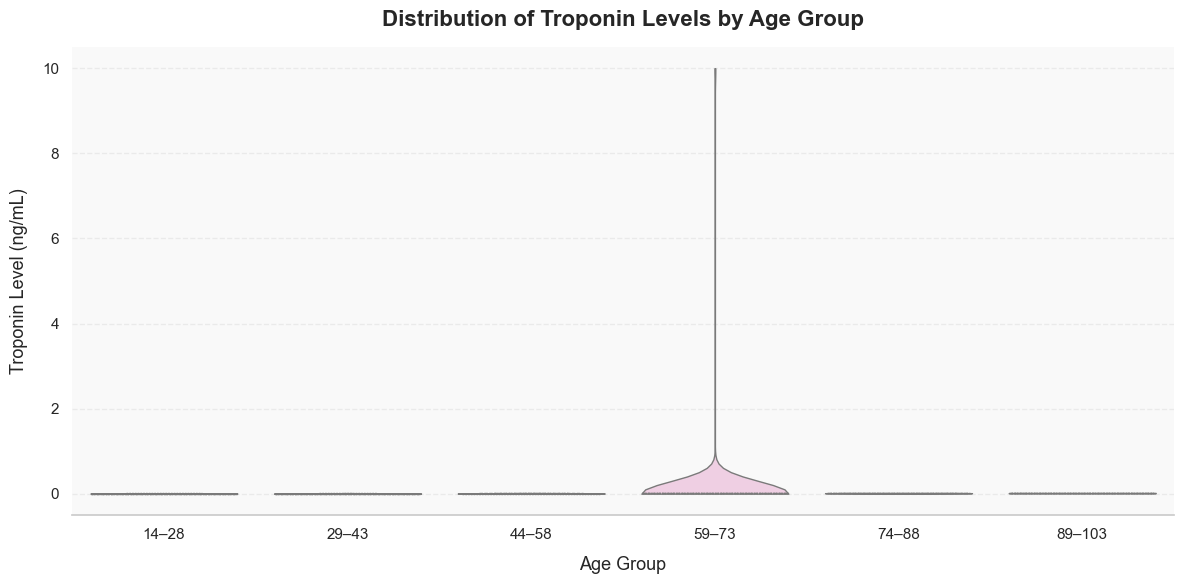

In [60]:
neg_bins = range(int(df_neg['Age'].min()), int(df_neg['Age'].max()) + 15, 15)
neg_labels = [f"{neg_bins[i]}–{neg_bins[i+1]-1}" for i in range(len(neg_bins)-1)]
df_neg['Age Group'] = pd.cut(df_neg['Age'], bins=neg_bins, labels=neg_labels, right=False)

sns.set(style="whitegrid", rc={"axes.facecolor": "#f9f9f9", "grid.color": "#dddddd"})

plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=df_neg,
    x='Age Group',
    y='Troponin',
    palette=sns.color_palette("Pastel2", len(neg_labels)),
    inner='quartile',
    linewidth=1,
    cut=0
)

plt.title('Distribution of Troponin Levels by Age Group', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Age Group', fontsize=13, labelpad=10)
plt.ylabel('Troponin Level (ng/mL)', fontsize=13, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Distribution of CK-MB Levels Across Age Groups for those with Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\3002668086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


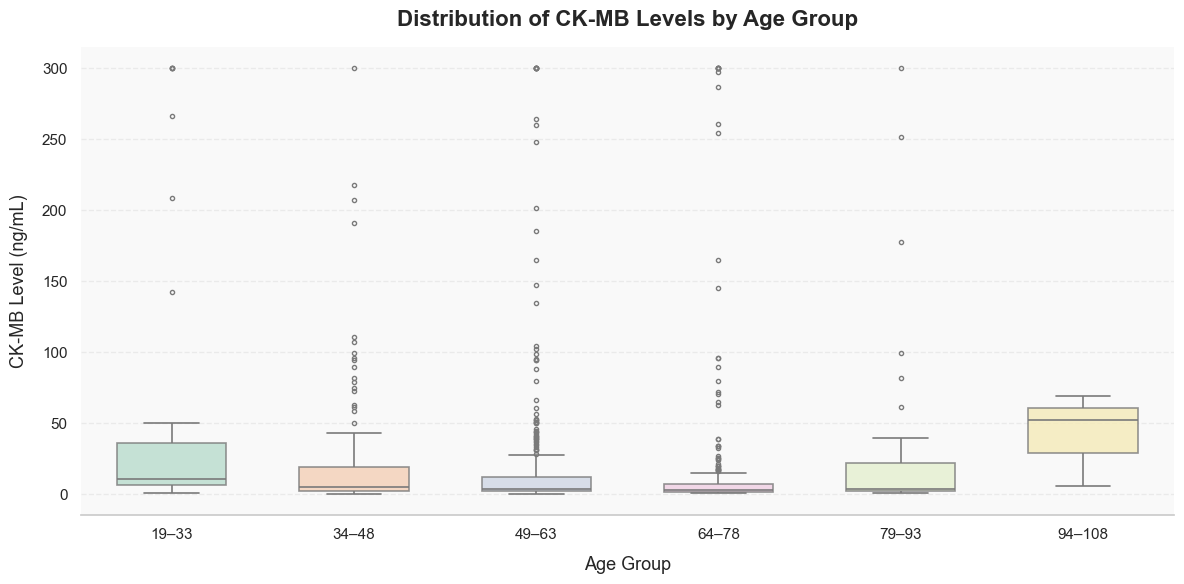

In [61]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f9f9f9", "grid.color": "#dddddd"})

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df_pos,
    x='Age Group',
    y='CK-MB',
    palette=sns.color_palette("Pastel2", len(df_pos['Age Group'].unique())),
    linewidth=1.2,
    fliersize=3,
    width=0.6,
    boxprops=dict(alpha=0.8)
)

plt.title('Distribution of CK-MB Levels by Age Group', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Age Group', fontsize=13, labelpad=10)
plt.ylabel('CK-MB Level (ng/mL)', fontsize=13, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Distribution of CK-MB Levels Across Age Groups for those without Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\3281374620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


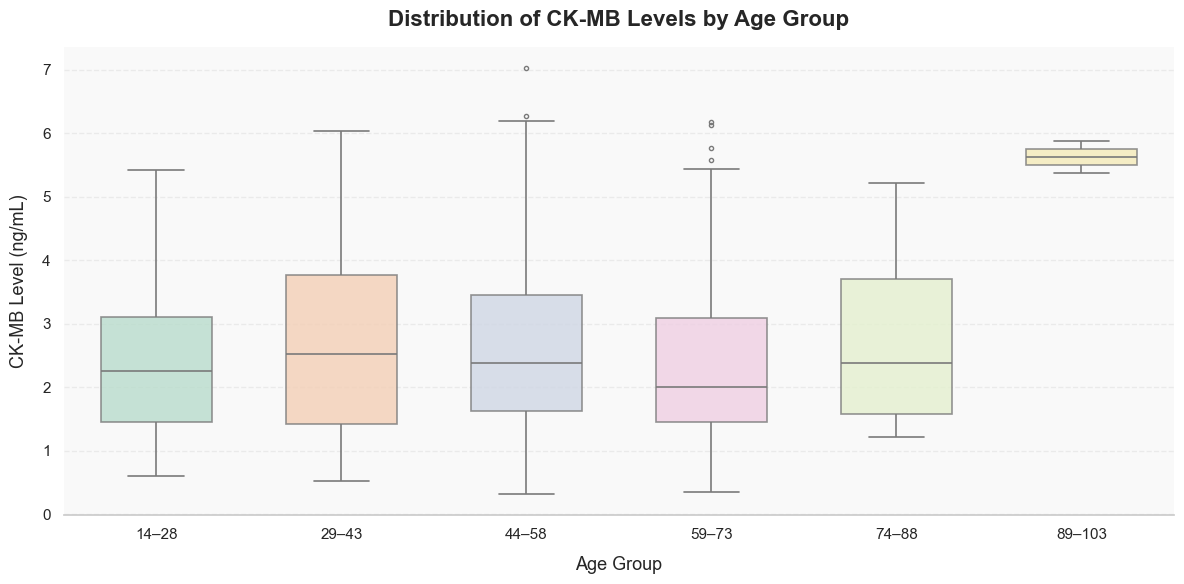

In [62]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f9f9f9", "grid.color": "#dddddd"})

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df_neg,
    x='Age Group',
    y='CK-MB',
    palette=sns.color_palette("Pastel2", len(df_neg['Age Group'].unique())),
    linewidth=1.2,
    fliersize=3,
    width=0.6,
    boxprops=dict(alpha=0.8)
)

plt.title('Distribution of CK-MB Levels by Age Group', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Age Group', fontsize=13, labelpad=10)
plt.ylabel('CK-MB Level (ng/mL)', fontsize=13, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Age vs Biomakers Trend Analysis

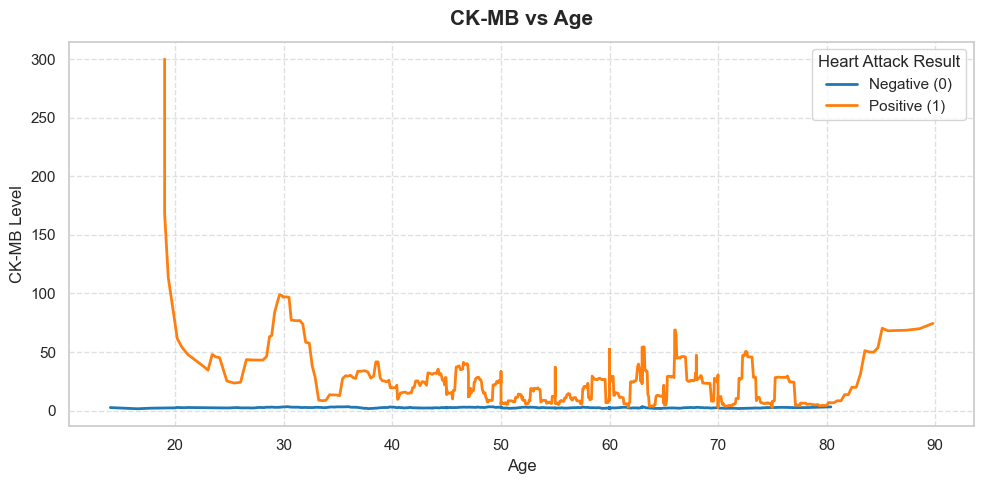

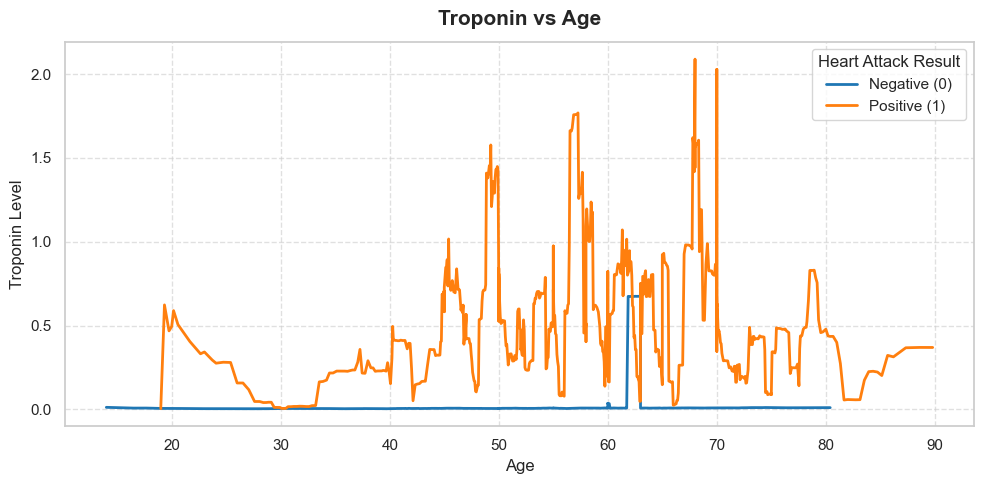

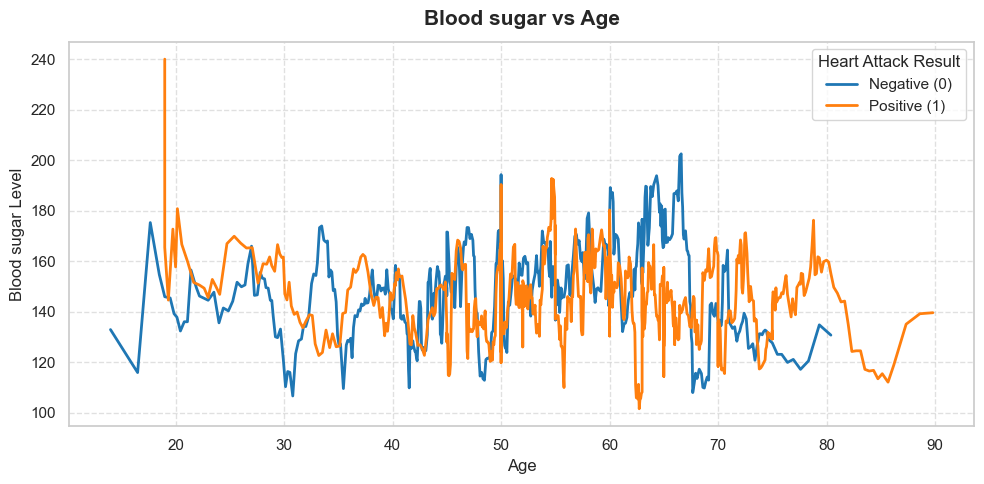

In [63]:
df_sorted = df.sort_values('Age')

biomarkers = ['CK-MB', 'Troponin', 'Blood sugar']
window_size = 15

sns.set(style="whitegrid")
palette = sns.color_palette("tab10", 2)

for biomarker in biomarkers:
    plt.figure(figsize=(10, 5))
    for result_val, label, color in zip([0, 1], ['Negative (0)', 'Positive (1)'], palette):
        subset = df_sorted[df_sorted['Result'] == result_val]
        rolled = subset[[biomarker, 'Age']].rolling(window=window_size, min_periods=1).mean()
        plt.plot(rolled['Age'], rolled[biomarker], label=label, color=color, linewidth=2)
    plt.title(f'{biomarker} vs Age', fontsize=15, fontweight='bold', pad=12)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel(f'{biomarker} Level', fontsize=12)
    plt.legend(title='Heart Attack Result')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

## Gender Based Differences

In [64]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

continuous_vars = ['Troponin', 'CK-MB', 'Systolic blood pressure', 'Diastolic blood pressure']

group_m = df[df['Gender'] == 1]
group_f = df[df['Gender'] == 0]

for feature in continuous_vars:
    data_m = group_m[feature].dropna()
    data_f = group_f[feature].dropna()
    
    # Normality check (optional)
    _, p_m = shapiro(data_m)
    _, p_f = shapiro(data_f)
    is_normal = p_m > 0.05 and p_f > 0.05

    print(f'\n🔹 {feature} (Normal: {is_normal}):')

    if is_normal:
        stat, p_val = ttest_ind(data_m, data_f, equal_var=False)
        print(f"  t-test p-value: {p_val:.4f}")
    else:
        stat, p_val = mannwhitneyu(data_m, data_f, alternative='two-sided')
        print(f"  Mann–Whitney U p-value: {p_val:.4f}")



🔹 Troponin (Normal: False):
  Mann–Whitney U p-value: 0.0000

🔹 CK-MB (Normal: False):
  Mann–Whitney U p-value: 0.3169

🔹 Systolic blood pressure (Normal: False):
  Mann–Whitney U p-value: 0.5904

🔹 Diastolic blood pressure (Normal: False):
  Mann–Whitney U p-value: 0.8287


## Biomakers vs Probability of Heart Attack

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


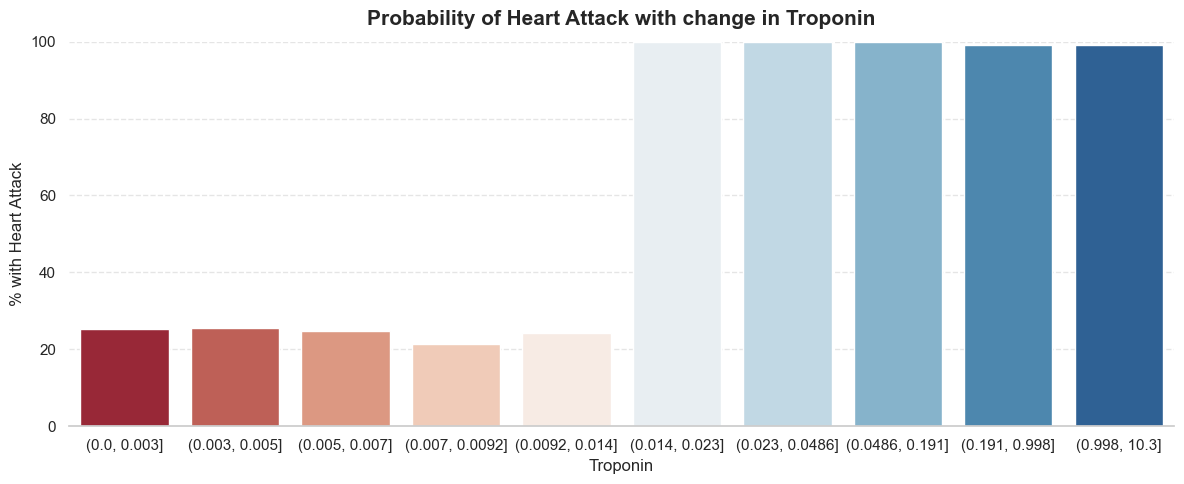

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


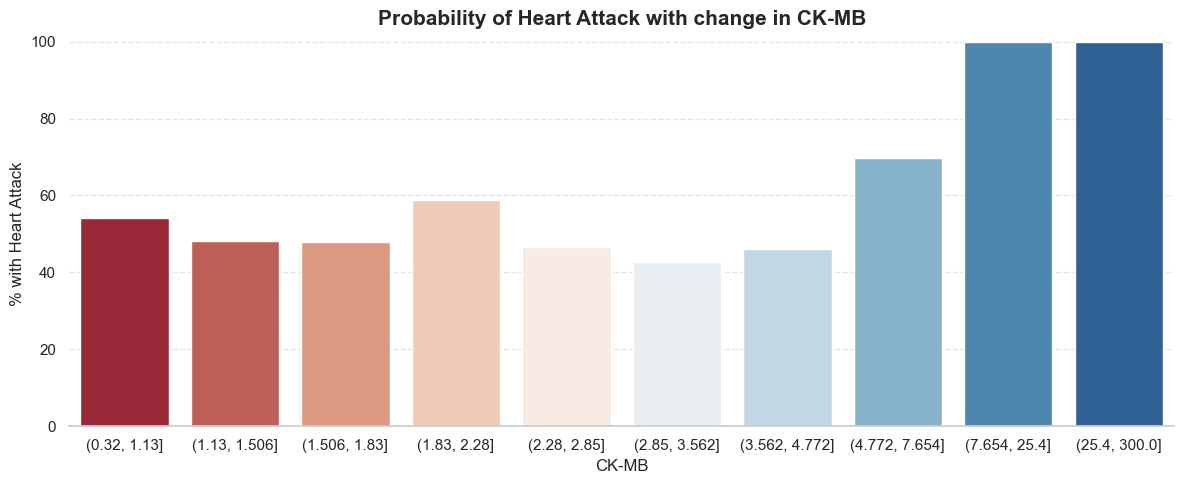

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


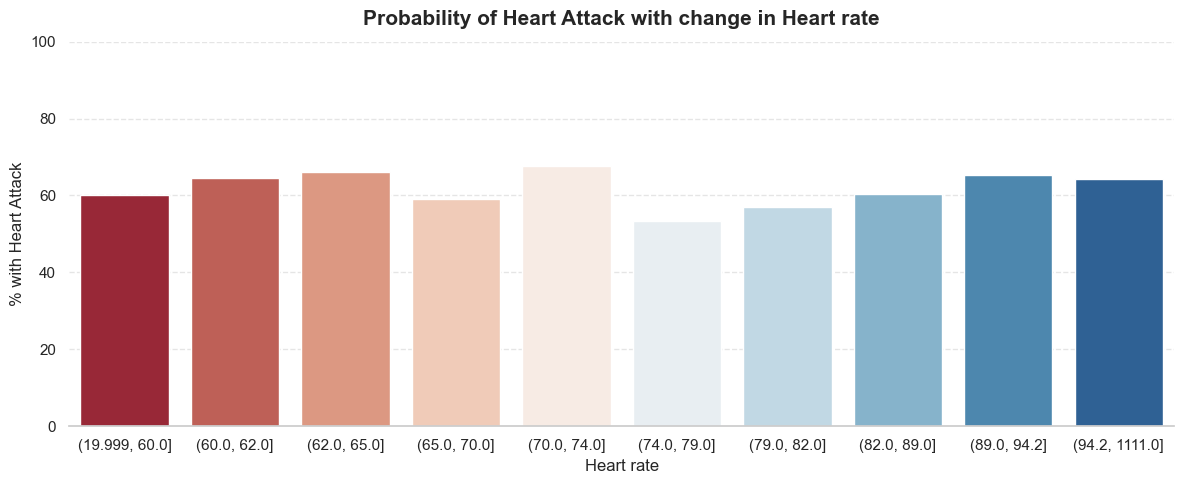

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


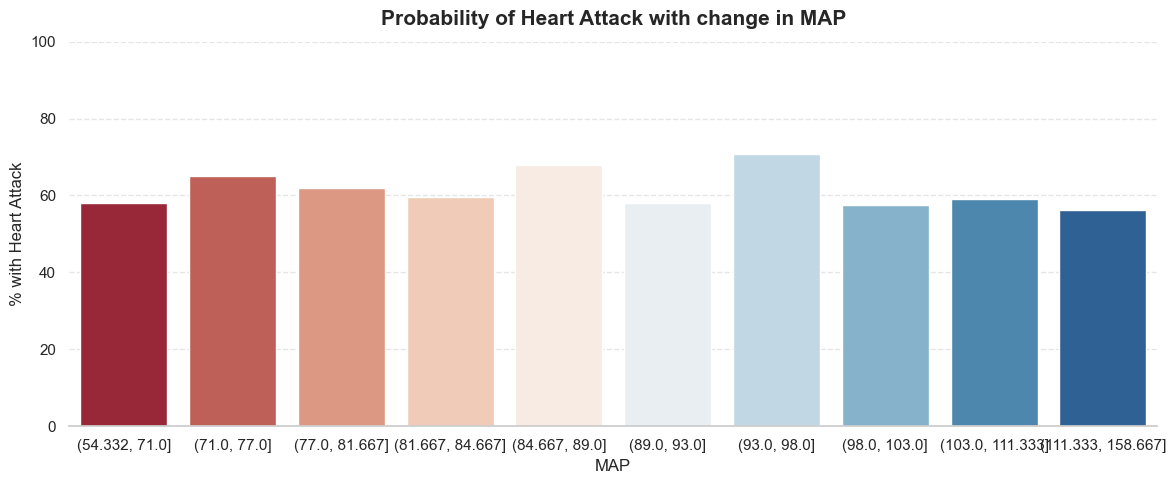

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


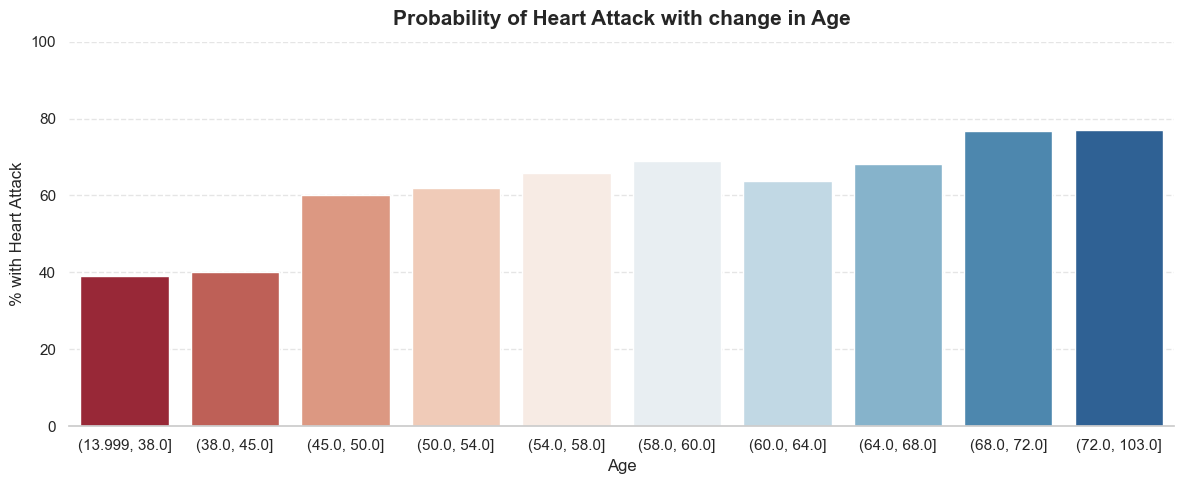

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\463323375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


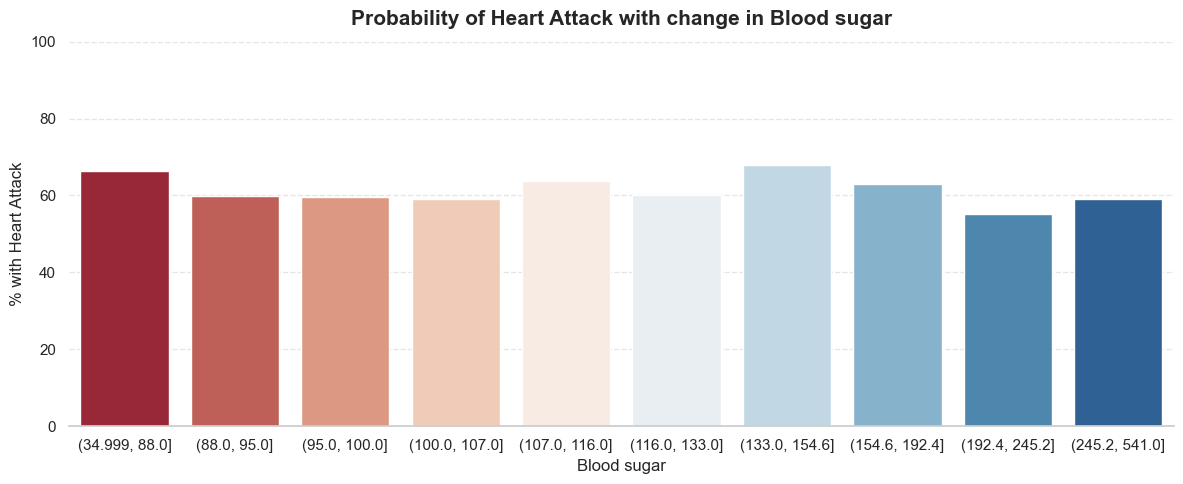

In [65]:
markers = ['Troponin', 'CK-MB', 'Heart rate', 'MAP', 'Age', 'Blood sugar']
n_bins = 10

sns.set(style="whitegrid")
palette = sns.color_palette("RdBu", n_bins)

for marker in markers:
    df1[f'{marker}_bin'] = pd.qcut(df1[marker], q=n_bins, duplicates='drop')

    bin_summary = (df1.groupby(f'{marker}_bin')['Result'].mean().mul(100).reset_index())
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(
        data=bin_summary,
        x=f'{marker}_bin',
        y='Result',
        palette=palette
    )
    plt.ylabel('% with Heart Attack', fontsize=12)
    plt.xlabel(f'{marker}', fontsize=12)
    plt.title(f'Probability of Heart Attack with change in {marker}', fontsize=15, fontweight='bold', pad=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    ax.set_ylim(0, 100)
    sns.despine(left=True)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


## Correlation Analysis

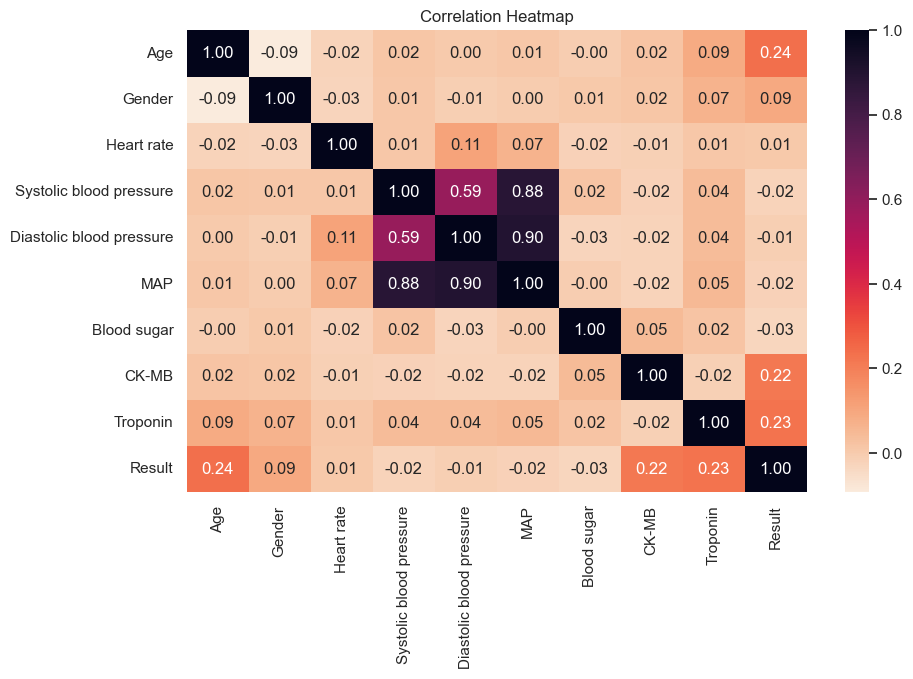

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

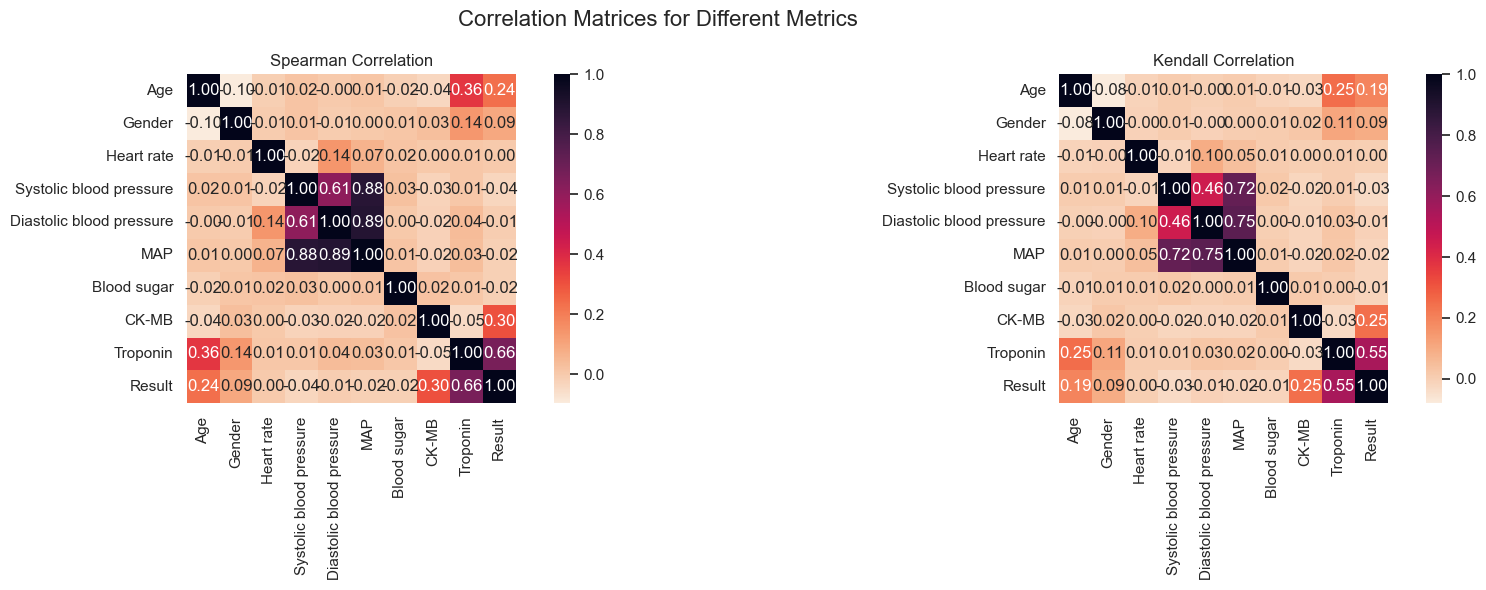

In [67]:
corr_spearman = df.corr(method='spearman')
corr_kendall = df.corr(method='kendall')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(corr_spearman, annot=True, cmap="rocket_r", fmt=".2f", cbar=True, square=True, ax=axes[0])
axes[0].set_title("Spearman Correlation")

sns.heatmap(corr_kendall, annot=True, cmap="rocket_r", fmt=".2f", cbar=True, square=True, ax=axes[1])
axes[1].set_title("Kendall Correlation")

plt.suptitle("Correlation Matrices for Different Metrics", fontsize=16)

plt.tight_layout()
plt.show()

In [68]:
corr_matrix = df.corr()
corr_matrix

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,MAP,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,0.010959,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.000540,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,0.068897,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.882064,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,0.898741,-0.025614,-0.023403,0.043360,-0.009659
MAP,0.010959,0.000540,0.068897,0.882064,0.898741,1.000000,-0.003634,-0.022483,0.048880,-0.016887
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,-0.003634,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,-0.022483,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.048880,0.021069,-0.016008,1.000000,0.229376
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.016887,-0.033059,0.217720,0.229376,1.000000


In [69]:
corr_matrix_result = corr_matrix['Result'].sort_values(ascending=False)
corr_matrix_result

Result                      1.000000
Age                         0.238097
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Heart rate                  0.006920
Diastolic blood pressure   -0.009659
MAP                        -0.016887
Systolic blood pressure    -0.020825
Blood sugar                -0.033059
Name: Result, dtype: float64

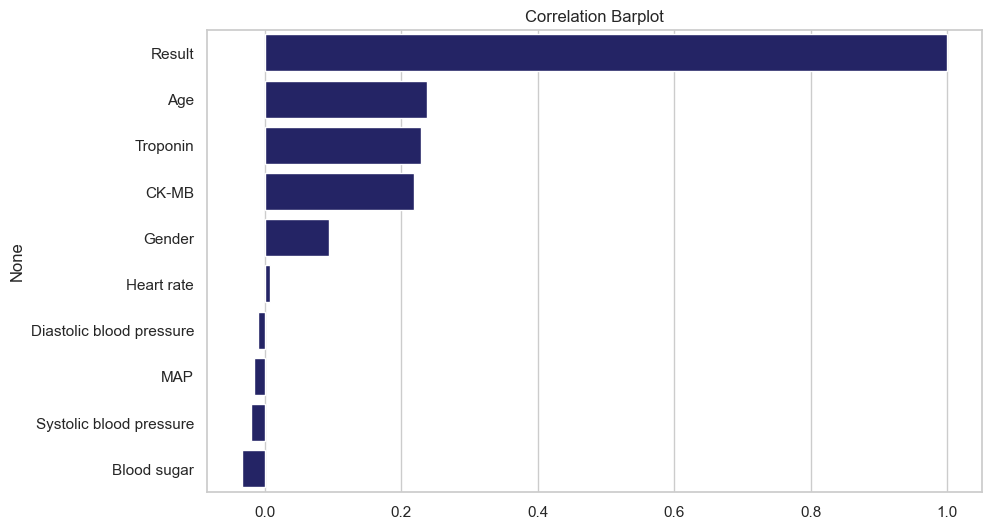

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x = corr_matrix_result.values, y = corr_matrix_result.index, color = 'midnightblue')
plt.title('Correlation Barplot')
plt.show()

## Statistical Testing

In [71]:
from scipy.stats import chi2_contingency
for col in df.columns:
    table = pd.crosstab(df[col], df['Result'])

    chi2, p, dof, expected = chi2_contingency(table)

    print(f'Chi-square test of {col}: χ² = {chi2:.3f}, p = {p:.6f} {"|| Significant" if p < 0.05 else "|| Not Significant"}')

Chi-square test of Age: χ² = 151.974, p = 0.000000 || Significant
Chi-square test of Gender: χ² = 11.356, p = 0.000752 || Significant
Chi-square test of Heart rate: χ² = 78.978, p = 0.447746 || Not Significant
Chi-square test of Systolic blood pressure: χ² = 128.625, p = 0.181740 || Not Significant
Chi-square test of Diastolic blood pressure: χ² = 72.642, p = 0.456657 || Not Significant
Chi-square test of MAP: χ² = 178.859, p = 0.742901 || Not Significant
Chi-square test of Blood sugar: χ² = 246.762, p = 0.420745 || Not Significant
Chi-square test of CK-MB: χ² = 730.746, p = 0.196472 || Not Significant
Chi-square test of Troponin: χ² = 798.936, p = 0.000000 || Significant
Chi-square test of Result: χ² = 1314.784, p = 0.000000 || Significant


# Feature Extraction

## Predictive Modeling


In [72]:
X = df.drop(columns=['Result'])
y = df['Result']

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Feature Importance

C:\Users\rohit\AppData\Local\Temp\ipykernel_29444\3242409211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Feature', data = importances_df, palette='viridis')


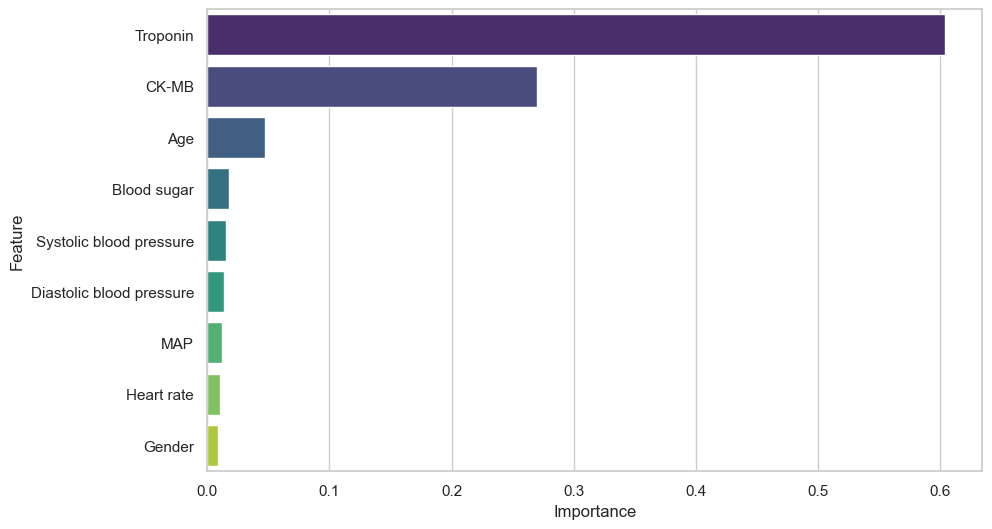

In [74]:
importances = model.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = importances_df, palette='viridis')
plt.show()

## Evaluation

In [75]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [76]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 98.11%


In [77]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



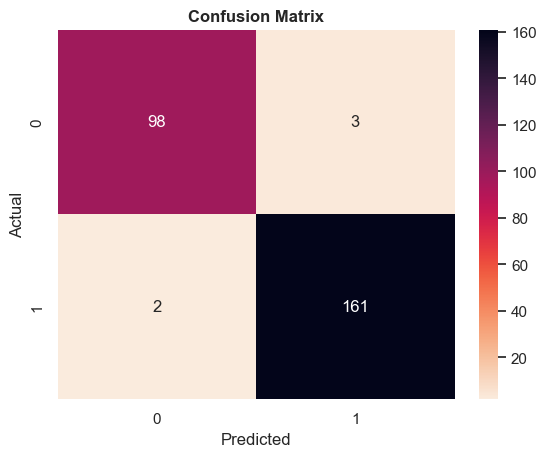

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rocket_r', fmt = 'd')
plt.title('Confusion Matrix', weight = 'bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

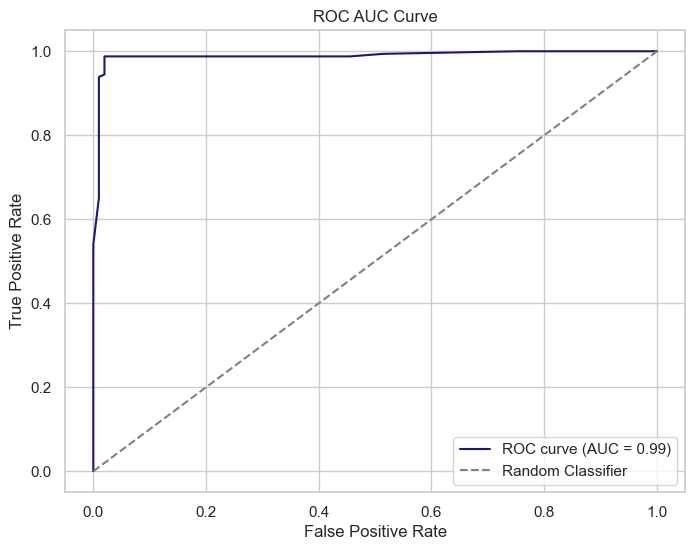

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='midnightblue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()